# Importing Necessary Packages

In [1]:
import numpy as np
import pandas as pd
from astropy.cosmology import FlatLambdaCDM

# Matplotlib figure basic setting
from matplotlib import pyplot as plt
from matplotlib import rc, rcParams
rc('axes', linewidth=2)
rc('font', weight='bold')
rc('xtick', top=True)
rc('xtick', bottom=True)
rc('xtick', direction='in')
rc('ytick', left=True)
rc('ytick', right=True)
rc('ytick', direction='in')
rcParams['text.latex.preamble'] = r'\usepackage{sfmath} \boldmath'

# Basic Physical Parameters

In [2]:
# Basic paramters of A2744
redshift = 0.3033
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
dist_lum = cosmo.luminosity_distance(redshift).value  # Mpc
dist_mod = 5.0*np.log10(dist_lum * 1.0e+6 / 10.)
A_F606W, A_F814W = 0.033, 0.020  # foreground extinction magnitude

# Reading SExtractor Photometry Catalog

In [3]:
# Reading the '*.csv' file using pandas read_csv into a data frame
df_full = pd.read_csv("A2744_sephot_results_full.csv")

# Overviewing the header (top 10 rows) of the data frame
df_full.head(10)

,ID,MAG_AUTO_F606W,MERR_AUTO_F606W,FLAGS_F606W,FLUX_RADIUS_F606W,FWHM_F606W,CLASS_STAR_F606W,MAG_AUTO_F814W,MERR_AUTO_F814W,FLAGS_F814W,FLUX_RADIUS_F814W,FWHM_F814W,CLASS_STAR_F814W
0,1,19.51,0.00,3.0,31.52,76.80,0.00,18.63,0.00,3.0,31.43,49.79,0.00
1,2,23.73,0.03,3.0,7.19,9.22,0.03,22.86,0.01,3.0,8.58,11.24,0.00
2,3,25.04,0.14,19.0,13.40,25.25,0.06,23.96,0.05,19.0,14.13,25.25,0.06
3,4,25.76,0.20,0.0,4.91,8.14,0.00,25.22,0.12,0.0,5.08,7.91,0.00
4,5,99.00,99.00,1.0,-1.36,0.00,0.36,28.48,0.69,1.0,1.71,0.00,0.35
5,6,26.46,0.19,1.0,4.86,0.00,0.35,26.53,0.21,1.0,4.74,0.00,0.37
6,7,99.00,99.00,1.0,-4.31,0.00,0.35,99.00,99.00,1.0,-8.81,0.00,0.28
7,8,27.91,0.47,1.0,1.62,-0.18,0.50,28.80,1.11,1.0,1.88,0.00,0.48
8,9,99.00,99.00,1.0,-32.76,0.00,0.02,99.00,99.00,1.0,2.17,0.00,0.34
9,10,99.00,99.00,1.0,6.23,0.00,0.03,29.07,1.02,1.0,1.77,0.00,0.35


# Selecting Valid Sources by Removing Artifacts

In [4]:
# Conditions for magnitude cut
mag_cnd = ((df_full['MAG_AUTO_F606W'] < 30.0) & (df_full['MERR_AUTO_F606W'] < 0.5) & \
           (df_full['MAG_AUTO_F814W'] < 30.0) & (df_full['MERR_AUTO_F814W'] < 0.5))

# Conditions for size cut
size_cnd = ((df_full['FLUX_RADIUS_F606W'] > 4.) & (df_full['FWHM_F606W'] > 4.) & \
            (df_full['FLUX_RADIUS_F814W'] > 4.) & (df_full['FWHM_F814W'] > 4.))

# Conditions for color cut
col_cnd = ((df_full['MAG_AUTO_F606W']-df_full['MAG_AUTO_F814W'] > -1.0) & \
           (df_full['MAG_AUTO_F606W']-df_full['MAG_AUTO_F814W'] < 2.0))

# Conditions for flag cut
flag_cnd = ((df_full['FLAGS_F606W'] < 4) & (df_full['FLAGS_F814W'] < 4))

# Conditions for stellarity cut
class_cnd = (df_full['CLASS_STAR_F814W'] < 0.4)

# Valid sources with satisfying all the above conditions
valid = (mag_cnd & size_cnd & col_cnd & flag_cnd & class_cnd)

# Printing the number of sources (full, valid)
print(f"Full: {len(df_full):d}, Valid: {np.sum(valid):d}")

Full: 4107, Valid: 716


# Writing a Catalog only with Valid Sources

In [5]:
filename = "A2744_sephot_results_valid.csv"

# Opening a new file (with 'writing' mode)
f = open(filename, 'w')

# Writing the column names at the first line
f.write("ID,")
f.write("MAG_AUTO_F606W,MERR_AUTO_F606W,FLAGS_F606W,FLUX_RADIUS_F606W,FWHM_F606W,CLASS_STAR_F606W,")
f.write("MAG_AUTO_F814W,MERR_AUTO_F814W,FLAGS_F814W,FLUX_RADIUS_F814W,FWHM_F814W,CLASS_STAR_F814W\n")

# Writing the data
for i in range(np.sum(valid)):
    f.write(f"{df_full['ID'][valid].values[i]:d},")
    f.write(f"{df_full['MAG_AUTO_F606W'][valid].values[i]:.2f},{df_full['MERR_AUTO_F606W'][valid].values[i]:.2f},")
    f.write(f"{df_full['FLAGS_F606W'][valid].values[i]:.2f},")
    f.write(f"{df_full['FLUX_RADIUS_F606W'][valid].values[i]:.2f},")
    f.write(f"{df_full['FWHM_F606W'][valid].values[i]:.2f},")
    f.write(f"{df_full['CLASS_STAR_F606W'][valid].values[i]:.2f},")
    f.write(f"{df_full['MAG_AUTO_F814W'][valid].values[i]:.2f},{df_full['MERR_AUTO_F814W'][valid].values[i]:.2f},")
    f.write(f"{df_full['FLAGS_F814W'][valid].values[i]:.2f},")
    f.write(f"{df_full['FLUX_RADIUS_F814W'][valid].values[i]:.2f},")
    f.write(f"{df_full['FWHM_F814W'][valid].values[i]:.2f},")
    f.write(f"{df_full['CLASS_STAR_F814W'][valid].values[i]:.2f}\n")
    
# Closing the new file
f.close()

# Plotting the Color-magnitude Diagram with Valid Sources

Text(0.07, 0.93, '(c) A2744 cluster')

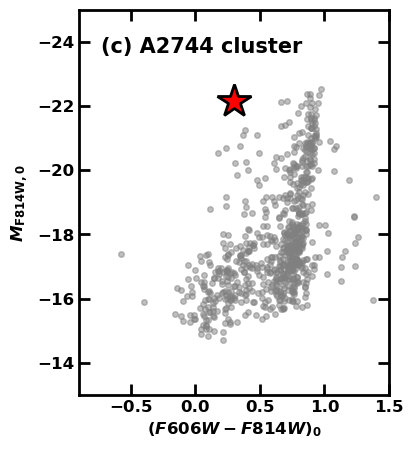

In [6]:
X = (df_full['MAG_AUTO_F606W'].values - df_full['MAG_AUTO_F814W'].values) - (A_F606W - A_F814W)  # Foreground extinction corrected color
Y = df_full['MAG_AUTO_F814W'].values - A_F814W - dist_mod  # Foreground extinction corrected, absolute magnitude


fig, ax = plt.subplots(figsize=(4,5))
ax.plot(X[valid], Y[valid], 'o', ms=4.0, color='gray', alpha=0.5)  # Plotting all the valid sources

ID_JFG = 1808  # JFG's ID
ax.plot(X[ID_JFG-1], Y[ID_JFG-1], '*', ms=25.0, color='red', mec='k', mew=2.0, alpha=1.0)  # Plotting the JFG data

# Other figure settings
ax.set_xlim([-0.9, 1.5])  # x lower limit, x upper limit
ax.set_ylim([-13.0, -25.0])  # y lower limit, y upper limit
ax.set_xlabel(r"$(F606W-F814W)_{0}$", fontsize=12.0)  # x label
ax.set_ylabel(r"$M_{\rm F814W,0}$", fontsize=12.0)  # y label
ax.tick_params(width=2.0, length=8.0, labelsize=12.0)  # Major tick setting and label font size

# Adding text in the figure
ax.text(0.07, 0.93, "(c) A2744 cluster", fontsize=15.0, fontweight='bold',
        color='k', ha='left', va='top', transform=ax.transAxes)